<a href="https://colab.research.google.com/github/simulate111/spatial-cross-validation-/blob/main/EMLM2024_exercise3_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3 | TKO_7092 Evaluation of Machine Learning Methods 2024
## deadline: 14.2.2024 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Mohammadreza Akhtari

Student number: 2304399

Student email: mohammadreza.akhtari@utu.fi

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=15 (15NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 15-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points):

- input.csv, contains the 75 predictor features.
- output.csv, contains the water permebility values.
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points.

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv).

#### 2. Perform spatial leave-one-out cross-validation with 15NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 for help). Estimate the water permeability prediction performance (using 15NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals from 0m to 250m).

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following:

- Your own implementation of the spatial leave-one-out cross-validation for the current task. You can use third-party libraries (e.g. Scikit-learn) if you want for implementing e.g. the 15-nearest neighbor. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value.


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

#'/content/drive/MyDrive/Colab Notebooks/*****.csv'

In [2]:
# In this cell, import all the libraries that you need. For example:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

### Read in the datasets

In [3]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).

#input_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/input.csv')
#output_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/output.csv')
#coordinates_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/coordinates.csv'



# Dataset is now stored in a Pandas Dataframe
input_data = pd.read_csv('https://raw.githubusercontent.com/simulate111/spatial-cross-validation-/main/input.csv')
output_data = pd.read_csv('https://raw.githubusercontent.com/simulate111/spatial-cross-validation-/main/output.csv')
coordinates_data = pd.read_csv('https://raw.githubusercontent.com/simulate111/spatial-cross-validation-/main/coordinates.csv')



#input_data = pd.read_csv('input.csv')
#output_data = pd.read_csv('output.csv')
#coordinates_data = pd.read_csv('coordinates.csv')

print("Input Dimensions:", input_data.shape)
print("Output Dimensions:", output_data.shape)
print("Coordinates Dimensions:", coordinates_data.shape)
print("Output Dimensions:", output_data)

Input Dimensions: (1690, 75)
Output Dimensions: (1690, 1)
Coordinates Dimensions: (1690, 2)
Output Dimensions:       5.8359
0     6.2592
1     6.9041
2     6.2065
3     7.0642
4     6.8203
...      ...
1685  6.7745
1686  5.1985
1687  4.6098
1688  5.8530
1689  4.1202

[1690 rows x 1 columns]


### Standardization of the predictor features (input.csv)

In [4]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance.
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this.
from sklearn.preprocessing import StandardScaler

# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance.
scaler = StandardScaler()
input_data_standardized = scaler.fit_transform(input_data)

# Print the first few rows of the standardized input data
#print("Standardized Input Data:")
#print(input_data_standardized[:5])


### Functions and analysis code

In [5]:
# Include here all the functions and other relevant code that you need in order to implement the task.

# Note! Utilize the following two functions in your implementation:

### Function for calculating C-index ###
# y: array containing true label values.
# yp: array containing the predicted label values.
def cindex(y, yp):
    n = 0
    h_num = 0
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt):
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt):
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n


### Function for calculating the pairwise spatial distances between the data points ###
# The function will return a n-by-n matrix of Euclidean distances. For example, the
# distance_matrix element at indices i,j will contain the spatial distance between
# data point i and j. Note that the element value is 0 always when i==j.
# coordinate_array: n-by-2 array containing the coordinates of the exercise data points.
def cdists(coordinate_array):
    number_of_observations = coordinate_array.shape[0]
    distance_matrix = np.zeros((number_of_observations, number_of_observations))
    for i in range(0, number_of_observations):
        distance_matrix[i, :] = np.sqrt(np.sum((coordinate_array - coordinate_array[i])**2, axis=1))
    return distance_matrix

### Results for spatial leave-one-out cross-validation with 15-nearest neighbor regression model

In [6]:
distance_matrix = cdists(coordinates_data.values)
distance_matrix.shape
distance_df = pd.DataFrame(distance_matrix)
distance_df

,0,1,2,3,4,5,6,7,8,9,...,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689
0,0.000000,540.832691,540.832691,672.011905,1712.337584,1820.027472,8384.515490,8387.514531,8414.992573,8414.992573,...,49110.101812,49492.525698,50040.399679,50952.084354,52183.799210,52284.534042,53787.441843,53794.144663,53906.568245,54039.068275
1,540.832691,0.000000,0.000000,134.536240,1906.724941,2009.975124,8551.818520,8554.232870,8576.456145,8576.456145,...,48661.644033,49046.524851,49590.100827,50512.081723,51727.830034,51846.697098,53302.761655,53311.748236,53420.610255,53552.744094
2,540.832691,0.000000,0.000000,134.536240,1906.724941,2009.975124,8551.818520,8554.232870,8576.456145,8576.456145,...,48661.644033,49046.524851,49590.100827,50512.081723,51727.830034,51846.697098,53302.761655,53311.748236,53420.610255,53552.744094
3,672.011905,134.536240,134.536240,0.000000,2001.224625,2102.878979,8627.914000,8630.202779,8651.294701,8651.294701,...,48572.573537,48958.273050,49500.404039,50425.807877,51636.197575,51761.125374,53200.978374,53210.803414,53318.354251,53450.351729
4,1712.337584,1906.724941,1906.724941,2001.224625,0.000000,107.703296,6676.076692,6678.929555,6705.221846,6705.221846,...,48523.190332,48892.375684,49462.762761,50320.099364,51635.971958,51640.871410,53416.836297,53407.809354,53544.841021,53679.850968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1685,52284.534042,51846.697098,51846.697098,51761.125374,51640.871410,51600.387595,50112.649102,50102.723479,50013.394206,50013.394206,...,3619.336956,3094.769781,3048.622640,1379.275172,3101.032086,0.000000,8965.288618,8478.354793,9272.842067,9387.672768
1686,53787.441843,53302.761655,53302.761655,53200.978374,53416.836297,53393.561410,52987.473992,52977.883121,52891.572107,52891.572107,...,8259.443080,8425.888677,7554.078369,8832.326987,5914.862636,8965.288618,0.000000,504.876222,310.483494,447.213595
1687,53794.144663,53311.748236,53311.748236,53210.803414,53407.809354,53383.541471,52915.424027,52905.806865,52819.258798,52819.258798,...,7871.727892,8017.986031,7140.000000,8372.628022,5440.854712,8478.354793,504.876222,0.000000,800.062498,909.340420
1688,53906.568245,53420.610255,53420.610255,53318.354251,53544.841021,53522.122529,53149.788334,53140.211705,53054.029065,53054.029065,...,8558.621384,8729.627713,7859.192070,9142.778571,6224.757023,9272.842067,310.483494,800.062498,0.000000,156.204994


In [7]:
def dzfolds(r, folds, data_distances, data_distance_indexes):
    dz_folds = []
    # We loop through every previously calculated fold
    for fold_index in folds:
        fold = [fold_index]  # Convert integer index to a list
        too_close_list = set()
        # Find data points too close to test data points
        for i in fold:
            close_inds = np.where(data_distances[i] <= r)[0]
            too_close_list = too_close_list.union(set(close_inds))
        dz_fold = list(fold)  # Make a copy of the fold
        # Include into dz_fold the indices of "too close" data
        for j in too_close_list:
            if j not in dz_fold:
                dz_fold.append(j)
        dz_folds.append(dz_fold)
    return dz_folds


In [8]:
dzradii = [i for i in range(0, 251, 80)]
performanceTable = np.zeros([len(dzradii), 2])

data_distances = cdists(coordinates_data.values)
data_distance_indexes = np.argsort(data_distances, axis=0)  # Calculate data_distance_indexes

for rind, dzradius in enumerate(dzradii):
    print("Analysis ongoing, dead zone radius:", dzradius)
    dz_folds = dzfolds(dzradius, range(len(output_data.values)), data_distances, data_distance_indexes)

    P = np.zeros(output_data.values.shape)
    for fold_id, dz_fold in enumerate(dz_folds):
        X_tr = np.delete(input_data_standardized, dz_fold, axis=0)
        Y_tr = np.delete(output_data.values, dz_fold, axis=0)
        learner = KNeighborsRegressor(n_neighbors=min(15, len(X_tr)))
        learner.fit(X_tr, Y_tr)
        preds = learner.predict(input_data_standardized[dz_fold])
        if preds.ndim == 0:
            P[dz_fold] = preds
        else:
            P[dz_fold] = preds[0:len(dz_fold)]
    perf = cindex(output_data.values, P)
    performanceTable[rind, 0] = dzradius
    performanceTable[rind, 1] = perf
print("Analysis done.")

print("Performance Table:")
print(performanceTable)



Analysis ongoing, dead zone radius: 0
Analysis ongoing, dead zone radius: 80
Analysis ongoing, dead zone radius: 160
Analysis ongoing, dead zone radius: 240
Analysis done.
Performance Table:
[[  0.           0.71821127]
 [ 80.           0.70334654]
 [160.           0.60696421]
 [240.           0.58956998]]


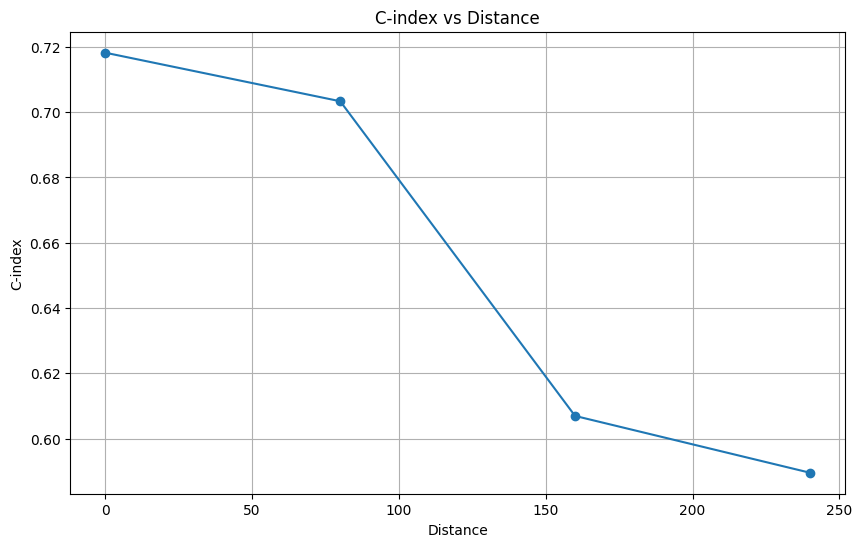

In [9]:
import matplotlib.pyplot as plt

# Extract distances and C-index values from performance_table
distances = performanceTable[:, 0]  # Assuming the first column contains distances
c_index_values = performanceTable[:, 1]  # Assuming the second column contains C-index values

# Plot C-index vs Distance
plt.figure(figsize=(10, 6))
plt.plot(distances, c_index_values, marker='o', linestyle='-')
plt.title('C-index vs Distance')
plt.xlabel('Distance')
plt.ylabel('C-index')
plt.grid(True)
plt.show()


In [10]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation
# with 15-nearest neighbor regression model and visualize the results as
# requested in the task assignment.




### Interpretation of the results

In [11]:
# In this cell, give a brief commentary on the results, what happens to the prediction
# performance as the prediction distance increases?